In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import *
from scipy.stats import norm,kstest,shapiro,t
import warnings
import seaborn as sns
import statistics
warnings.filterwarnings('ignore')
from risk_management import *
from scipy.optimize import fsolve

## Problem1

Assume you a call and a put option with the following 

- Current Stock Price $165 
- Current Date 02/25/2022 
- Options Expiration Date 03/18/2022 
- Risk Free Rate of 0.25% 
- Continuously Compounding Coupon of 0.53%

Calculate the time to maturity using calendar days (not trading days). 

For a range of implied volatilities between 10% and 80%, plot the value of the call and the put. 

Discuss these graphs. How does the supply and demand affect the implied volatility?

In [2]:
# Time to maturity
current = datetime(2022,2,25)
expiration = datetime(2022,3,18)
TTM = expiration-current
print(f"The time to maturity of the option is {TTM.days} days")

The time to maturity of the option is 21 days


In [3]:
# plot the value of the call and the put
def black_scholes(S,K,T,r,q,sigma,call=True):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)
    if call==True:
        return S*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    else:
        return K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)


S = 165
K = 165
T = TTM.days/365
r = 0.25/100
q = 0.53/100
sigmas = np.linspace(0.1,0.8,8)
call_prices = []
put_prices = []
for sig in sigmas:
    call_prices.append(black_scholes(S,K,T,r,q,sig,call=True))
    put_prices.append(black_scholes(S,K,T,r,q,sig,call=False))
data = pd.DataFrame({'call':call_prices,
                    'put':put_prices},index = sigmas)


<AxesSubplot:>

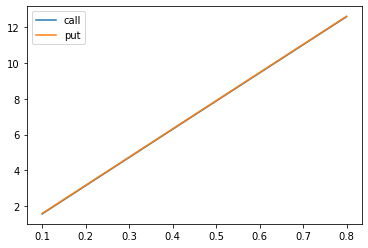

In [4]:
data.plot()

In [5]:
data

,call,put
0.1,1.565138,1.591713
0.2,3.143474,3.170049
0.3,4.721326,4.747901
0.4,6.298489,6.325064
0.5,7.874743,7.901317
0.6,9.449861,9.476436
0.7,11.023620,11.050195
0.8,12.595794,12.622369


## Conclusion 1
The supply and demand of a underlying asset affects implied volatility. As the demand for an option increases, implied volatility will rise. This leads to a higher premium for the option contract. On the contrary, when the supply becomes higher than demand, the fluctuation will fall which leads to a lower premium for the option contract.


## Problem 2
Use the options found in AAPL_Options.csv 
- Current AAPL price is 164.85 
- Current Date, Risk Free Rate and Dividend Rate are the same as problem #1. 

Calculate the implied volatility for each option. 

Plot the implied volatility vs the strike price for Puts and Calls. Discuss the shape of these graphs. What market dynamics could make these graphs? 

There are bonus points available on this question based on your discussion. Take some time to research if needed.

In [6]:
def implied_volatility(S,K,T,r,q,opt_price,call=True):
    volatility = lambda x: black_scholes(S,K,T,r,q,x,call) - opt_price
#     def eq(sigma):
#         return black_scholes(S,K,T,r,q,sigma,call=True) - opt_price
    return fsolve(volatility, x0 = 0.5)[0]

In [7]:
AAPL = pd.read_csv("AAPL_Options.csv")
AAPL
S = 164.85
T = (datetime(2022,3,18) - datetime(2022,2,25)).days/365
r = 0.0025
q = 0.0053
K = AAPL['Strike']
Type = AAPL['Type']=='Call'
opt_price = AAPL['Last Price']

vol = []
for i in range(len(K)):
    vol.append(implied_volatility(S,K[i],T,r,q,opt_price[i],Type[i]))
AAPL['Implied vol'] = np.array(vol)

In [8]:
# Calculate the implied volatility for each option.
AAPL

,Stock,Expiration,Type,Strike,Last Price,Implied vol
0,AAPL,3/18/2022,Call,135.0,30.175,0.499899
1,AAPL,3/18/2022,Call,140.0,25.300,0.452888
2,AAPL,3/18/2022,Call,145.0,20.525,0.412722
3,AAPL,3/18/2022,Call,150.0,15.850,0.369708
4,AAPL,3/18/2022,Call,155.0,11.525,0.340396
5,AAPL,3/18/2022,Call,160.0,7.525,0.304318
6,AAPL,3/18/2022,Call,165.0,4.225,0.273381
7,AAPL,3/18/2022,Call,170.0,1.935,0.249892
8,AAPL,3/18/2022,Call,175.0,0.715,0.235941
9,AAPL,3/18/2022,Call,180.0,0.260,0.237803


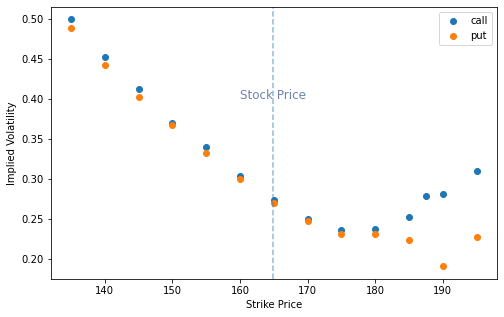

In [9]:
fig, axes = plt.subplots(figsize=(8,5))
call = AAPL[AAPL['Type']=='Call']
put = AAPL[AAPL['Type']=='Put']
axes.scatter(x = call['Strike'], y = call['Implied vol'], label = 'call')
axes.scatter(x = put['Strike'], y = put['Implied vol'],label = 'put')
axes.axvline(x = S, linestyle='dashed', alpha=0.5)
axes.text(x=S, y=0.4, s='Stock Price', fontsize=12,alpha=0.7, color='#334f8d',horizontalalignment='center')
axes.set_xlabel("Strike Price")
axes.set_ylabel("Implied Volatility")
plt.legend()

## Conclusion2
Basically, implied volatility has "volatility smile": A situation in which at-the-money options have lower implied volatility than out-of-the-money or in-the-money.

But in the above figure, the IV shows volatility skew charateristic. In particular, the implied volatility is higher on lower options strikes. This phenomenon occurs because of the risk of a "crash" in the markets, or in some particular underlying assets like index options because investors have market concerns and buy puts to compensate for the perceived risks.

## Problem 3.1
Use the portfolios found in problem3.csv 
- Current AAPL price is 164.85 
- Current Date, Risk Free Rate and Dividend Rate are the same as problem #1. 

For each of the portfolios, graph the portfolio value over a range of underlying values. Plot the portfolio values and discuss the shapes. Bonus points available for tying these graphs to other topics discussed in the lecture. 

In [10]:
port = pd.read_csv('problem3.csv')
port

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50


In [11]:
r = 0.25/100
q = 0.53/100
S = 164.85

T = (datetime(2022,3,18) - datetime(2022,2,25)).days/365

K = port['Strike']
Type = np.where((port['OptionType'] == "Call"), True, np.where((port['OptionType'] == "Put"), False, np.nan))
opt_price = port['CurrentPrice']


implied_vol = []
for i in range(len(K)):
    if port['Type'][i]=='Option':
        implied_vol.append(implied_volatility(S,K[i],T,r,q,opt_price[i],Type[i]))
    else:
        implied_vol.append(np.nan)
        
port['Implied vol'] = np.array(implied_vol)
port

,Portfolio,Type,Underlying,Holding,OptionType,ExpirationDate,Strike,CurrentPrice,Implied vol
0,Straddle,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290822
1,Straddle,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273284
2,SynLong,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290822
3,SynLong,Option,AAPL,-1,Put,3/18/2022,165.0,4.40,0.273284
4,CallSpread,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290822
5,CallSpread,Option,AAPL,-1,Call,3/18/2022,175.0,0.72,0.236480
6,PutSpread,Option,AAPL,1,Put,3/18/2022,165.0,4.40,0.273284
7,PutSpread,Option,AAPL,-1,Put,3/18/2022,155.0,1.60,0.331382
8,Stock,Stock,AAPL,1,NaN,NaN,NaN,164.85,NaN
9,Call,Option,AAPL,1,Call,3/18/2022,165.0,4.50,0.290822


In [12]:
# values calculation
underlying_values = list(range(100,280))
def portfolio_value(port, underlying_values, simulated_date):

    value_dataframe = pd.DataFrame(port['Portfolio'])
    r = 0.25/100
    q = 0.53/100
    
    for S in underlying_values:
        port_value = []
        for i in range(len(port)):
            if port['Type'][i] == 'Option':
                expiration = pd.to_datetime(port['ExpirationDate'][i])
                current = simulated_date
                T = (expiration-current).days/365
                K = port["Strike"][i]
                sigma = port["Implied vol"][i]
                if port['OptionType'][i] == 'Call':
                    value = black_scholes(S,K,T,r,q,sigma,call=True)*port["Holding"][i]
                elif port['OptionType'][i] == 'Put':
                    value = black_scholes(S,K,T,r,q,sigma,call=False)*port["Holding"][i]
                port_value.append(value)
            else:

                port_value.append(S)

        value_dataframe[str(S)] = np.array(port_value)


    value_dataframe = value_dataframe.groupby('Portfolio').sum()
    return value_dataframe
value_dataframe = portfolio_value(port, underlying_values,datetime(2022,2,25)).T
round(value_dataframe,6)

Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
100,0.000000,0.000000,100.000000,165.006757,65.006757,9.998562,100.0,65.006757,-65.006757
101,0.000000,0.000000,101.000000,165.007062,64.007062,9.998562,101.0,64.007062,-64.007062
102,0.000000,0.000000,102.000000,165.007367,63.007367,9.998562,102.0,63.007367,-63.007367
103,0.000000,0.000000,103.000000,165.007672,62.007672,9.998562,103.0,62.007672,-62.007672
104,0.000000,0.000000,104.000000,165.007977,61.007977,9.998561,104.0,61.007977,-61.007977
...,...,...,...,...,...,...,...,...,...
275,109.939888,9.998562,165.060112,275.000000,0.000000,-0.000000,275.0,109.939888,109.939888
276,110.939583,9.998562,165.060417,276.000000,0.000000,-0.000000,276.0,110.939583,110.939583
277,111.939278,9.998562,165.060722,277.000000,0.000000,-0.000000,277.0,111.939278,111.939278
278,112.938973,9.998562,165.061027,278.000000,0.000000,-0.000000,278.0,112.938973,112.938973


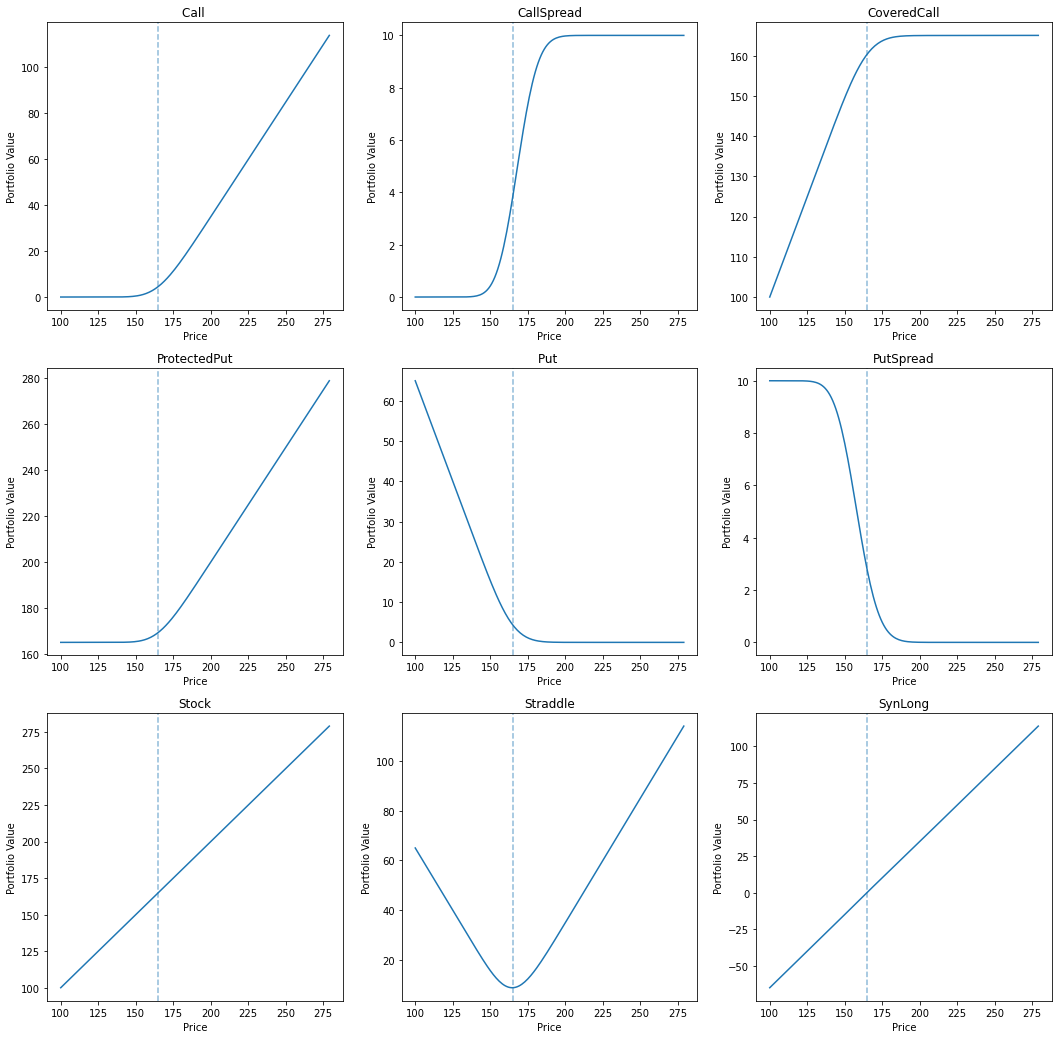

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
i=0
for p in value_dataframe.columns:
    ax = axes[i//3][i%3]
    value_dataframe[p].plot(ax = ax)
    ax.set_title(p)
    ax.set_xlabel("Price")
    ax.set_ylabel("Portfolio Value")
    ax.axvline(x = S-100, linestyle='dashed', alpha=0.5)
    #ax.text(x=-ES_p, y=0.00004, s='Expected shortfall', fontsize=12,alpha=0.7, color='#334f8d',horizontalalignment='center')

    i+=1

## Conclusion 3.1
Call Spread: A bull call spread consists of one long call with a lower strike price and one short call with a higher strike price in the same underlying asset and expriation date.

Put Spread: A put spread consists of 2 puts in different direction but in the same underlying asset and expriation date.
- Maximum profit: strike prices difference which is 10
- Maximum risk: the underlying asset price is too low/high and the call/put is worthless

CoveredCall: A covered call is a two-part strategy in which stock is purchased and calls are sold.
- Maximum profit: strike price - stock price + premium
- Maximum risk: when price goes down, the loss is unlimited

Protected Put: A Protected Put is a two-part strategy in which stock is purchased and puts are bought.
- Maximum profit: stock price less premium paid which is unlimited
- Maximum risk: stock price - strike price - premium

Straddle: simultaneously buying both a put option and a call option for the underlying security with the same strike price and the same expiration date. This strategy expects the underlying asset has a high fluctuation.
- Maximum profit: unlimited
- Maximum risk: 2 premuim paid

Synlong: A strategy that repeats the stock payoff.


# problem 3.2
Using DailyReturn.csv. Fit a Normal distribution to AAPL returns – assume 0 mean return. Simulate AAPL returns 10 days ahead and apply those returns to the current AAPL price (above). Calculate Mean, VaR and ES. Discuss.



In [14]:
S = 164.85
returns = pd.read_csv("DailyReturn.csv",index_col=0)['AAPL']
sigma = returns.std()
return_simu = norm.rvs(0,sigma,(2000,10))
simu_AAPL = [S*(1+x).cumprod()[-1] for x in return_simu]
simu_AAPL = pd.DataFrame(simu_AAPL)

In [15]:
Pred_PortfolioVal = portfolio_value(port, list(simu_AAPL.values),datetime(2022,3,7))
Pred_PortfolioVal.T

Portfolio,Call,CallSpread,CoveredCall,ProtectedPut,Put,PutSpread,Stock,Straddle,SynLong
[164.58725427],3.109457,2.903628,161.477797,167.923515,3.336261,2.629987,164.587254,6.445718,-0.226804
[171.16831558],7.314243,5.997658,163.854073,172.174918,1.006603,0.844805,171.168316,8.320846,6.307640
[171.42605596],7.514730,6.118857,163.911326,172.378910,0.952854,0.801048,171.426056,8.467584,6.561875
[170.52800046],6.826296,5.692569,163.701704,171.678560,1.150560,0.961368,170.528000,7.976856,5.675736
[173.3798689],9.103929,6.994765,164.275939,173.995926,0.616057,0.523781,173.379869,9.719987,8.487872
...,...,...,...,...,...,...,...,...,...
[166.75324461],4.281488,3.869973,162.471757,169.098869,2.345624,1.896252,166.753245,6.627112,1.935863
[149.01296097],0.063628,0.063560,148.949333,165.053231,16.040270,8.762945,149.012961,16.103897,-15.976642
[158.93791744],1.084923,1.063115,157.852994,165.951310,7.013392,5.039113,158.937917,8.098315,-5.928469
[161.66409517],1.881958,1.811927,159.782137,166.713722,5.049627,3.814355,161.664095,6.931585,-3.167669


In [16]:
Strategy = port['Portfolio'].unique()
Port_pv = []
for i in range(len(Strategy)):
    data = port[port['Portfolio']==Strategy[i]] 
    pv = (data['CurrentPrice']*data['Holding']).sum()
    Port_pv.append(pv)
    
PredMean = []
PredVaR = []
PredES = []
Pred_PnL = pd.DataFrame()

for i in range(len(Strategy)):
    PnL = (Pred_PortfolioVal.T[Strategy[i]]-Port_pv[i]).values
    Pred_PnL[Strategy[i]] = PnL
    PredMean.append(PnL.mean())
    PredVaR.append(VaR.VaR_Historic(PnL))
    PredES.append(ES.ES(PnL))
Pred_PnL

,Straddle,SynLong,CallSpread,PutSpread,Stock,Call,Put,CoveredCall,ProtectedPut
0,-2.454282,-0.326804,-0.876372,-0.170013,-0.262746,-1.390543,-1.063739,1.127797,-1.326485
1,-0.579154,6.207640,2.217658,-1.955195,6.318316,2.814243,-3.393397,3.504073,2.924918
2,-0.432416,6.461875,2.338857,-1.998952,6.576056,3.014730,-3.447146,3.561326,3.128910
3,-0.923144,5.575736,1.912569,-1.838632,5.678000,2.326296,-3.249440,3.351704,2.428560
4,0.819987,8.387872,3.214765,-2.276219,8.529869,4.603929,-3.783943,3.925939,4.745926
...,...,...,...,...,...,...,...,...,...
1995,-2.272888,1.835863,0.089973,-0.903748,1.903245,-0.218512,-2.054376,2.121757,-0.151131
1996,7.203897,-16.076642,-3.716440,5.962945,-15.837039,-4.436372,11.640270,-11.400667,-4.196769
1997,-0.801685,-6.028469,-2.716885,2.239113,-5.912083,-3.415077,2.613392,-2.497006,-3.298690
1998,-1.968415,-3.267669,-1.968073,1.014355,-3.185905,-2.618042,0.649627,-0.567863,-2.536278


In [17]:
stat = pd.DataFrame({"Mean":PredMean,'VaR':PredVaR,'ES':PredES},index = Strategy)
stat

,Mean,VaR,ES
Straddle,0.338289,2.441943,2.451368
SynLong,-0.141394,13.707487,17.088904
CallSpread,-0.217352,3.638080,3.718294
PutSpread,0.366440,2.661019,2.734265
Stock,-0.016912,13.486274,16.847817
Call,0.098447,4.357743,4.438201
Put,0.239842,4.239549,4.324288
CoveredCall,-0.115359,9.128532,12.409616
ProtectedPut,0.222930,4.136530,4.197114


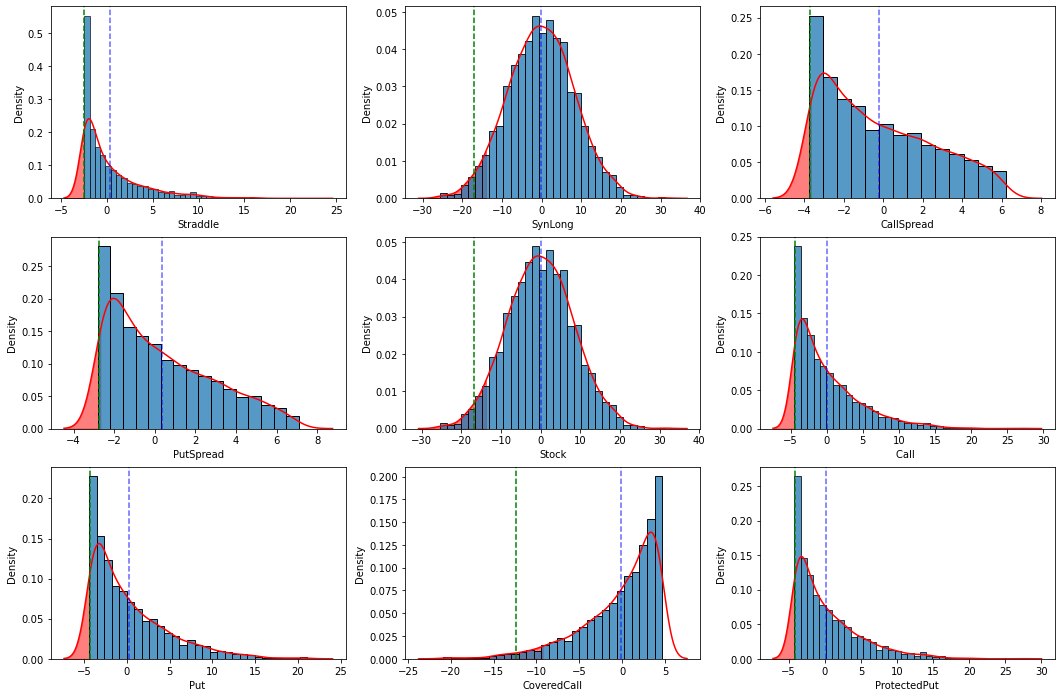

In [18]:
rets_sim = Pred_PnL.reset_index(drop=True)
i=0
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for p in Strategy:
    ax = axes[i//3][i%3]
    sns.histplot(rets_sim[p], ax=ax, stat='density', label='Simulated Return')
    sns.kdeplot(rets_sim[p], ax=ax, color = 'r')
    
    # plot VaR
    ret, ret_density = ax.lines[0].get_data()
    ax.fill_between(ret, ret_density, where=(ret<-stat.loc[p].VaR), color='r', alpha=0.5)
    ax.axvline(x = -stat.loc[p].ES, linestyle='dashed', color = 'g',alpha=1)
    ax.axvline(x = stat.loc[p].Mean, linestyle='dashed', color = 'b',alpha=0.6)

    i+=1
    

## Conclusion 3.2
A better way to calculate the VaR and ES is to use the % of returns because we need to assume the same amount invested in each asset. The blue line represents the mean and the green line represents the ES.

- Call/Put Strategy: positive average payoff with similar VaR and ES
- Covered call/Protected put: average return close to 0 and has the lowest risk
- Straddle: the payoff is aggregated, the average return is positive with relative low ES and VaR
- The most risky asset is SynLong with extremely high VaR and ES, which is a repetition of the underlying asset payoff.